导入必要的包

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn import svm

构建散点数据

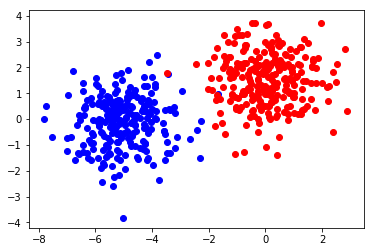

In [3]:
plt.figure()
centers = [[-5, 0], [0, 1.5]]
X, y = make_blobs(n_samples=500, centers=centers, random_state=50)
colors = "br"
for i, color in zip([0,1], colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)
plt.show()

构建Logistic Regression模型

In [4]:
clfLR = LogisticRegression().fit(X, y)
# 参数集合
wLR = clfLR.coef_[0]
# 斜率
aLR = -wLR[0] / wLR[1]
# 坐标点
xxLR = np.linspace(-5, 5)
yyLR = aLR * xxLR - clfLR.intercept_[0] / wLR[1]

构建SVM模型

In [5]:
# fit the model and get the separating hyperplane
clfSVM = svm.SVC(kernel='linear', C=1.0)
clfSVM.fit(X, y)

wSVM = clfSVM.coef_[0]
aSVM = -wSVM[0] / wSVM[1]
xxSVM = np.linspace(-5, 5)
yySVM = aSVM * xxSVM - clfSVM.intercept_[0] / wSVM[1]


# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xxSVM - wclf.intercept_[0] / ww[1]

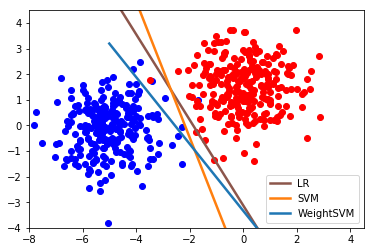

In [6]:
plt.figure()
# plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

h2 = plt.plot(xxLR, yyLR, lw=2.5,color='#8c564b', label='LR')
# plt.title("Decision surface of LogisticRegression " )
plt.axis('tight')

# Plot also the training points

# Plot the three one-against-all classifiers
# xmin, xmax = plt.xlim()
# ymin, ymax = plt.ylim()



# plot separating hyperplanes and samples
h0 = plt.plot(xxSVM, yySVM, lw=2.5, color='#ff7f0e',label='SVM')
h1 = plt.plot(xxSVM, wyy, lw=2.5, color='#1f77b4',label='WeightSVM')
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()

plt.axis('tight')
plt.xlim(-8,4.5)
plt.ylim(-4,4.5)

for i, color in zip([0,1], colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

plt.show()

试验了三个方法，逻辑回归，SVM，带权重的SVM在更多且包含outlier的数据上的情况

其中带权重的SVM是事先为两个数据集赋予权重，蓝：红为1:10，也就是重要程度红色类别是蓝色类别的10倍

可以看出三个方法都较好的回归出了不同的分类面，
-	仍然SVM的最好，且由于传入了松弛变量的参数C，是的SVM能很好地处理outlier
-	WeightSVM的分类因为红色类别的权重高于蓝色，所以将所有红色数据点都分到一侧
-	LR模型效果不错，但差于SVM
